In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [0]:
from google.colab import files

In [5]:
data = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [0]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [10]:
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [13]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [14]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

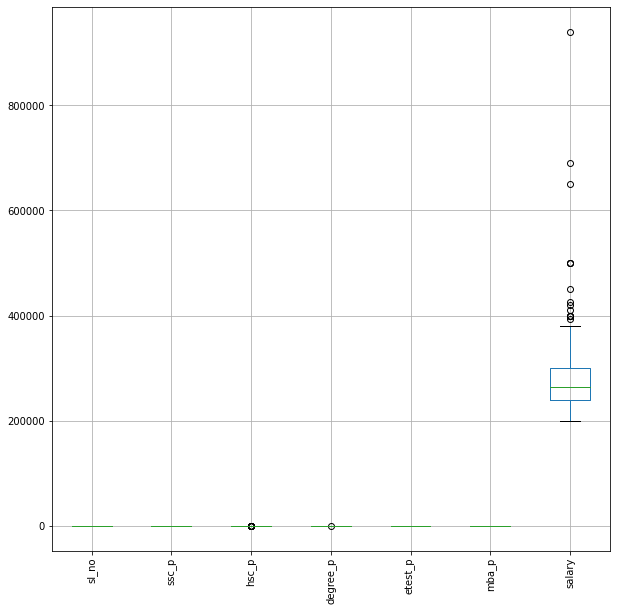

In [15]:
data.boxplot(rot=90, figsize=(10,10))

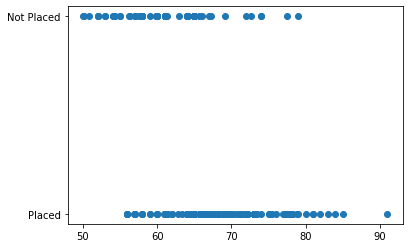

In [16]:
plt.scatter(data['degree_p'], data['status'])

In [17]:
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


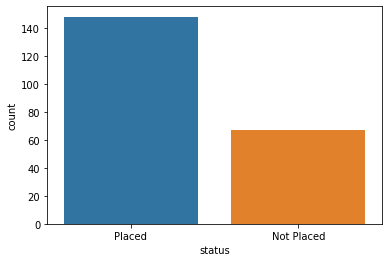

In [18]:
sb.countplot(x="status", data=data,)

In [0]:
data = data[['ssc_p','hsc_p','degree_p','status']]

In [40]:
type(data['status'])

pandas.core.series.Series

In [43]:
data.head()

,ssc_p,hsc_p,degree_p,status
0,67.00,91.00,58.00,Placed
1,79.33,78.33,77.48,Placed
2,65.00,68.00,64.00,Placed
3,56.00,52.00,52.00,Not Placed
4,85.80,73.60,73.30,Placed


In [24]:
data.head(10)

,ssc_p,hsc_p,degree_p,status
0,67.00,91.00,58.00,Placed
1,79.33,78.33,77.48,Placed
2,65.00,68.00,64.00,Placed
3,56.00,52.00,52.00,Not Placed
4,85.80,73.60,73.30,Placed
5,55.00,49.80,67.25,Not Placed
6,46.00,49.20,79.00,Not Placed
7,82.00,64.00,66.00,Placed
8,73.00,79.00,72.00,Placed
9,58.00,70.00,61.00,Not Placed


In [0]:
data = data.replace(to_replace = "Placed", value=1)

In [0]:
data = data.replace(to_replace = "Not Placed", value = 0)


In [48]:
data.head(20)

,ssc_p,hsc_p,degree_p,status
0,67.00,91.00,58.00,1
1,79.33,78.33,77.48,1
2,65.00,68.00,64.00,1
3,56.00,52.00,52.00,0
4,85.80,73.60,73.30,1
5,55.00,49.80,67.25,0
6,46.00,49.20,79.00,0
7,82.00,64.00,66.00,1
8,73.00,79.00,72.00,1
9,58.00,70.00,61.00,0


In [0]:
y = data["status"]
x = data[['degree_p','ssc_p','hsc_p']]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2,random_state=10)

In [0]:
from sklearn.linear_model import LogisticRegression

In [87]:
x_test

,degree_p,ssc_p,hsc_p
78,64.50,84.00,90.90
91,50.80,52.00,57.00
110,72.00,69.50,70.00
124,64.33,67.00,71.00
70,62.00,82.00,61.00
111,61.00,51.00,54.00
19,70.00,60.00,67.00
35,72.00,69.00,78.00
109,65.00,52.00,63.00
181,64.21,62.00,60.33


In [0]:
lr = LogisticRegression()

In [100]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict = lr.predict(x_test)

In [66]:
y_predict

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [67]:
y_test

78     1
91     0
110    1
124    1
70     1
111    0
19     1
35     1
109    0
181    0
129    1
146    1
61     1
46     0
59     1
155    0
165    0
187    1
172    1
136    0
128    1
72     1
193    1
49     0
169    0
63     0
178    1
56     1
24     1
190    0
26     1
106    0
149    0
52     0
182    0
20     1
200    1
5      0
76     1
175    0
138    1
1      1
2      1
Name: status, dtype: int64

In [0]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [70]:
accuracy_score(y_test,y_predict)

0.8372093023255814

In [71]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.92      0.67      0.77        18\n           1       0.80      0.96      0.87        25\n\n    accuracy                           0.84        43\n   macro avg       0.86      0.81      0.82        43\nweighted avg       0.85      0.84      0.83        43\n'

In [72]:
confusion_matrix(y_test,y_predict)

array([[12,  6],
       [ 1, 24]])

In [0]:
first_friend = lr.predict(np.array([65.5,86.8,98.5]).reshape(1,-1))

reshape(-1,1) #For if  single feature in data

reshape(1,-1) #For if single sample in data

In [98]:
first_friend

array([1])